https://campus.datacamp.com/courses/improving-your-data-visualizations-in-python/highlighting-your-data?ex=1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [2]:
# # save dataset
# url = 'https://assets.datacamp.com/production/repositories/3841/datasets/a6b11493e11dd47f3e03e0b96e2a2dbc51f03cb2/pollution_wide.csv'
# pollution = pd.read_csv(url)
# pollution.to_csv('pollution_dataset.csv',index = False)

pollution = pd.read_csv('pollution_dataset.csv')
pollution.shape

(8888, 8)

In [30]:
np.unique(pollution.city)

array(['Cincinnati', 'Denver', 'Des Moines', 'Fairbanks', 'Houston',
       'Indianapolis', 'Long Beach', 'Vandenberg Air Force Base'],
      dtype=object)

In [8]:
pollution.head(4)

,city,year,month,day,CO,NO2,O3,SO2
0,Cincinnati,2012,1,1,0.245,20.0,0.030,4.20
1,Cincinnati,2012,1,2,0.185,9.0,0.025,6.35
2,Cincinnati,2012,1,3,0.335,31.0,0.025,4.25
3,Cincinnati,2012,1,4,0.305,25.0,0.016,17.15


## part 1. highlighting your data

> ### 1.Hardcoding a highlight

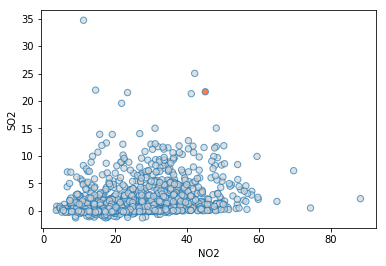

In [21]:
houston_pollution = pollution[pollution.city  ==  'Houston']
houston_pollution.head(5)

# Make array orangred for day 330 of year 2014, otherwise lightgray

houston_colors = ['orangered' if (day == 330) & (year == 2014) else 'lightgray' 
                  for day, year in zip(houston_pollution.day, houston_pollution.year) ]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7, "s": 40
#                            ,'edgecolors': 'lightblue'
                          })

plt.show()

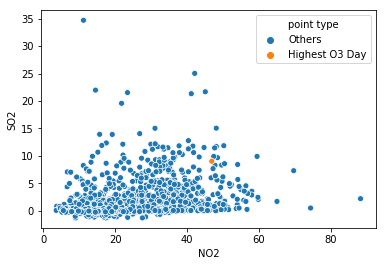

In [23]:
# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point type',
                data = houston_pollution)
plt.show()

> ## 2. compare groups
   - if you have two/three groups, plot histgram in pairs is a good way to vis.
       - or  two overlaid kernel density estimation plots 
   - if too many groups, sns.warmplot or sns.boxplot is good.


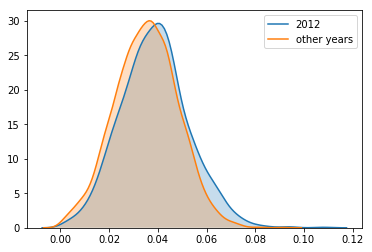

In [24]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()

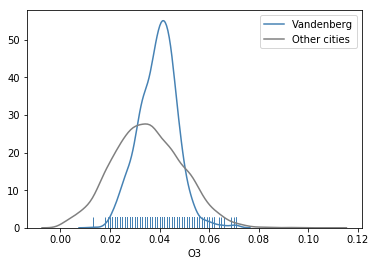

In [27]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg',
                # Turn of the histogram and color blue to stand out
               hist = False, 
             color = 'steelblue',  
               # Turn on rugplot
               rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3,
             label = 'Other cities',
               # Turn off histogram and color gray
               hist = False,
             color = 'gray')
plt.show()

> ## 3. annotation

- with simple text, which helps to note outlier

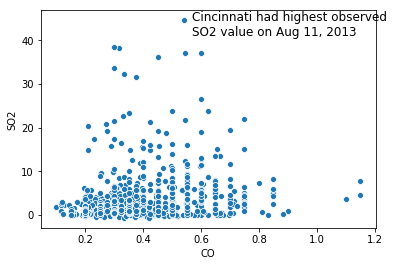

In [29]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

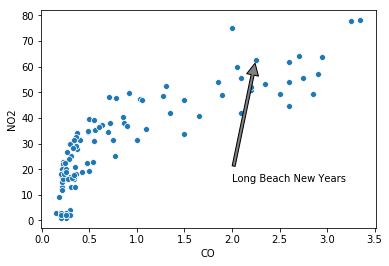

In [31]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(day  ==  1) & (city  ==  'Long Beach')")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')

plt.show()

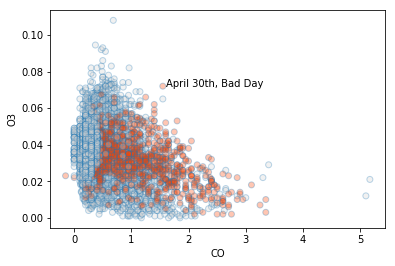

In [32]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

> ## 3. Colors
   - a remedy of color-illusion, add an uniform coloredge
   - or change it to single color
   - split one chart to multiple charts (facetGrid)

- bad example

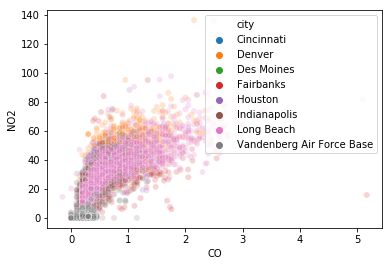

In [34]:
# this is bad
sns.scatterplot('CO', 'NO2',
                alpha = 0.2,
                hue = 'city',
                data = pollution)
plt.show()

- so we improve to have facetGrid

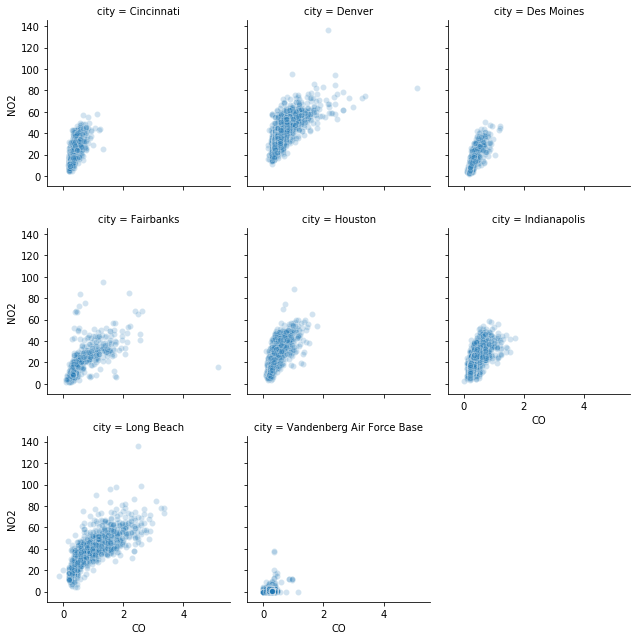

In [33]:
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3 #num of chart in one row
                 )

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

- add a black color to each bar's edge

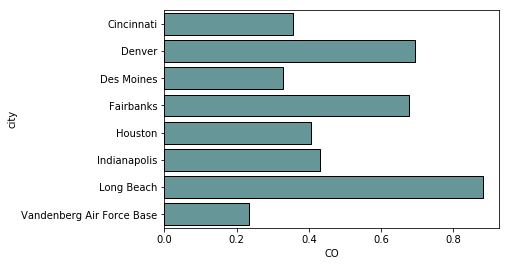

In [37]:
sns.barplot(y = 'city', x = 'CO', 
              estimator = np.mean,
            ci = False,
              data = pollution,
              # Add a border to the bars
            edgecolor = 'black',
            # Or Replace border with bar colors
            color = 'cadetblue')
plt.show()

## part 2. Use colors in your visualizations

> ### 4a. Continuous color palettes
   - color is less precise than lenght of the bar(numbers)
   - be aware of color blind: palette in the same color only uses intensity is safer.
   - sns.light_palette, sns.dark_palette, sns.divering_palette, sns.color_palette()


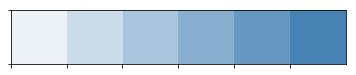

In [3]:
blue_scale = sns.light_palette("steelblue") # light is low
# blue_scale = sns.dark_palette("steelblue") # dark/black is low
# blue_scale = sns.diverging_palette(250,0) 
# blue_scale = sns.diverging_palette(250,0, center = 'dark') 
sns.palplot(blue_scale)

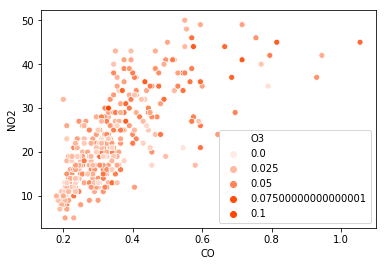

In [4]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                                  as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)

plt.show()

In [6]:
cinci_2014.head(4)

,city,year,month,day,CO,NO2,O3,SO2
380,Cincinnati,2014,1,1,0.465,24.0,0.023,3.65
381,Cincinnati,2014,1,6,0.260,13.0,0.033,9.75
382,Cincinnati,2014,1,7,0.250,18.0,0.027,11.40
383,Cincinnati,2014,1,8,0.360,34.0,0.017,4.90


- change the plot in a dark background and color bar neutral to be black

In [ ]:
# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_o3,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)
plt.show()

> ### 4b. categorical color palettes
   - Try and limit to 10 or fewer categories
   - Keep color-blindness in mind
   - ColorBrewer palettes are built with this in mind and keep the colors as distinct as possible.
      - colorbrewer_palettes = ['Reds', 'Blues', 'YlOrBr', 'PuBuGn', 'GnBu', 'Greys']
   - use ordinal columns as a hue (year, ratings) is a good way
  

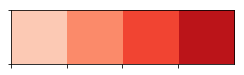

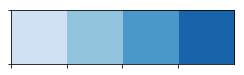

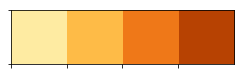

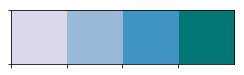

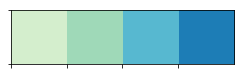

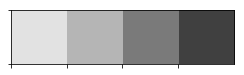

In [10]:
# colorbrewer_palettes = ['Reds', 'Blues', 'YlOrBr', 'PuBuGn', 'GnBu', 'Greys']

for pal in ['Reds', 'Blues', 'YlOrBr', 'PuBuGn', 'GnBu', 'Greys']:
    sns.palplot(pal=sns.color_palette(pal, n_colors=4))

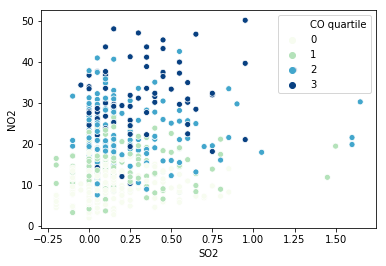

In [11]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                data = des_moines,
                palette = 'GnBu')
plt.show()

## part 3. Uncertainy
   - uncertainty is needed when estimates from samples(a subset)
   - 95% confidence interval
   - confidence band

In [ ]:
# Construct CI bounds for averages
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

average_ests.head(6)
# Setup a grid of plots, with non-shared x axes limits
g = sns.FacetGrid(average_ests, row = 'pollutant', sharex=  False)

# Plot CI for average estimate
g.map(plt.hlines, 'y', 'lower', 'upper')

# Plot observed values for comparison and remove axes labels
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('') 

plt.show()

#### result
![title](image1.png)

- plot confidence interval with point estimates

In [ ]:
# diffs_by_year.head(4)
#    year      mean   std_err     lower     upper
# 0  2013  0.840820  0.870135 -0.864645  2.546284
# 1  2014 -1.337625  0.761541 -2.830245  0.154996
# 2  2015 -0.649327  0.618175 -1.860950  0.562295

# Set start and ends according to intervals 
# Make intervals thicker
plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', 
           linewidth = 5, color = 'steelblue', alpha = 0.7,
           data = diffs_by_year)
# Point estimates
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

# Add a 'null' reference line at 0 and color orangered
plt.axvline(x = 0, color = 'orangered', linestyle = '--')

# Set descriptive axis labels and title
plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

- plot confidence band

In [ ]:
# Draw 99% inverval bands for average NO2
vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58 *vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58 *vandenberg_NO2['std_err']

# Plot mean estimate as a white semi-transparent line
plt.plot('day', 'mean', data = vandenberg_NO2,
         color = 'white', alpha = 0.4)

# Fill between the upper and lower confidence band values
plt.fill_between(x = 'day', 
                 y1 = 'lower', y2 = 'upper', 
                 data = vandenberg_NO2)

plt.show()

In [ ]:

"""Setup a grid of plots with columns divided by location"""
g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)

# Map interval plots to each cities data with corol colored ribbons
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')

# Map overlaid mean plots with white line
g.map(plt.plot, 'day', 'mean', color = 'white')

plt.show()

In [ ]:
for city, color in [('Denver',"#66c2a5"), ('Long Beach', "#fc8d62")]:
    # Filter data to desired city
    city_data = SO2_compare[SO2_compare.city  ==  city]

    # Set city interval color to desired and lower opacity
    plt.fill_between(x = 'day', y1 = 'lower', y2 = 'upper', data = city_data,
                     color = color, alpha = 0.4)
    
    # Draw a faint mean line for reference and give a label for legend
    plt.plot('day','mean', data = city_data, label = city,
             color = color, alpha = 0.25)

plt.legend()
plt.show()

In [ ]:
# Add interval percent widths
alphas = [     0.01,  0.05,   0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']


for alpha, color, width in zip(alphas, colors, widths):
    # Grab confidence interval
    conf_ints = pollution_model.conf_int(alpha)
    
    # Pass current interval color and legend label to plot
    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
               colors = color, label = width, linewidth = 10) 

# Draw point estimates
plt.plot(pollution_model.params, pollution_model.params.index, 'wo', label = 'Point Estimate')

plt.legend()
plt.show() 

"""
Or this way
"""
# Interval size setup
sizes = ['99%', '95%', '90%']
Z_scores = [2.58, 1.96, 1.67]
colors = ['#fee0b6','#f1a340', '#b35806']
for size, z, color in zip(sizes, Z_scores, colors):
    plt.hlines(y = data.y,
# Calculate lower and upper boundaries
    xmin = data['est'] - z*data['std_err'], xmax = data['est'] + z*data['std_err'], # Color by interval size
    color = color,
    # Make line thicker for visibility
    linewidth = 7,
    # Label line so legend text is clear
    label = size)

plt.plot('est', 'y', 'ko', data = data, label = 'Point Estimate')
plt.legend()

#### result
![title](image2.png)

In [ ]:
- plot confidence band over time with different CI

In [ ]:
int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    
    # Pass lower and upper confidence bounds and lower opacity
    plt.fill_between(
        x = cinci_13_no2.day, alpha = 0.4, color = color,
        y1 = cinci_13_no2['mean'] - Z*cinci_13_no2['std_err'],
        y2 = cinci_13_no2['mean'] + Z*cinci_13_no2['std_err'],
        label = percent)
    
plt.legend()
plt.show()

In [ ]:
# Decrase interval thickness as interval widens
sizes =      [    15,  10,  5]
int_widths = ['90% CI', '95%', '99%']
z_scores =   [    1.67,  1.96,  2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent, 
               # Resize lines and color them gray
               linewidth = size, 
               color = 'gray') 
    
# Add point estimate
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

######result
![title](image3.png)

> bootstrap plot

In [ ]:
# Perform bootstrapped mean on a vector
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data,len(data)))
            for _ in range(n_boots) ] # Generate 1,000 bootstrap samples


cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

# Generate bootstrap samples
boot_means = bootstrap(cinci_may_NO2, 1000)

# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Plot shaded area for interval
plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)

# Draw histogram of bootstrap samples
sns.distplot(boot_means, bins = 100, kde = False)

plt.show()

In [ ]:
# no2_so2_boot.shape
# (4340, 3)

# no2_so2.shape
# (62, 2)



sns.lmplot('NO2', 'SO2', data = no2_so2_boot,
           # Tell seaborn to a regression line for each sample
           hue = 'sample', 
           # Make lines blue and transparent
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           # Disable built-in confidence intervals
           ci = None, legend = False, scatter = False)

# Draw scatter of all points
plt.scatter('NO2', 'SO2', data = no2_so2)

plt.show()

- bootstrap with beeswarm

In [ ]:
# Initialize a holder DataFrame for bootstrap results
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    # Filter to city
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    # Bootstrap city data & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots,cur_boot])

# Beeswarm plot of averages with citys on y axis
sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color = 'coral')

plt.show()

## part 4. visualizations for exploration

In [15]:
# add include = 'all' can give categorical features a summary too.
pollution.describe(include= 'all')

,city,year,month,day,CO,NO2,O3,SO2,CO quartile
count,8888,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000,8888.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Houston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2013.621737,6.657516,187.187894,0.492867,23.689168,0.035904,3.824927,1.461971
std,NaN,1.084081,3.328182,101.739060,0.403896,16.760212,0.013221,6.582867,1.140868
min,NaN,2012.000000,1.000000,1.000000,-0.150000,0.000000,0.000000,-1.300000,0.000000
25%,NaN,2013.000000,4.000000,102.000000,0.250000,11.000000,0.027000,0.500000,0.000000
50%,NaN,2014.000000,7.000000,192.000000,0.350000,22.000000,0.036000,1.650000,1.000000
75%,NaN,2015.000000,9.000000,272.000000,0.551875,34.600000,0.045000,4.150000,2.250000


- a good way to explore numerical features and their interactions

In [ ]:
# Make a scatter matrix of numeric columns
pd.plotting.scatter_matrix(markets[numeric_columns], 
                           # Make figure large to show details
                           figsize = [15,10], 
                           # Lower point opacity to show overlap
                           alpha = 0.5)

- a good way to show correlation with alpha = 0.2

In [ ]:
 sns.regplot('NO2', 'CO', ci=False, data=pollution,
       # Lower opacity of points
       scatter_kws={'alpha':0.2, 'color':'grey'} )
 

- plot annotation as iterrows!

In [ ]:
g = sns.scatterplot("SO2","CO", data=long_beach_avgs)
# Iterate over the rows of our data
for _, row in long_beach_avgs.iterrows(): # Unpack columns from row
    month, SO2, CO = row
    # Draw annotation in correct place
    g.annotate(month, (SO2,CO)) 
    
plt.title('Long Beach avg SO2 by CO')

######result
![title](image4.png)

In [ ]:
- clean up background

In [ ]:
# Set background to white with grid
sns.set_style('whitegrid')

plt.scatter('good','prop selling', marker = '_', alpha = 0.7, data = goods_by_state)

# Draw lines across goods for highlighted states
highlighted = goods_by_state.query("state in ['New Mexico','North Dakota','Vermont']")
sns.lineplot('good','prop selling', 'state', data = highlighted, legend = False)

highlighted.head(5)
# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(left = True, bottom = True)
plt.show()

######result
![title](image5.png)

In [ ]:
# Decrease font size so state names are less crowded
sns.set(font_scale = 0.5)

# Switch to an appropriate color palette
blue_pal = sns.light_palette("steelblue", as_cmap = True)

# Order states by longitude
g = sns.heatmap(markets_by_month.reindex(state_by_lon), 
            # Add gaps between cells
            linewidths = 0.1, 
            # Set new palette and remove color bar 
            cmap = blue_pal, cbar = False,
            yticklabels = True)

# Rotate y-axis ticks 
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.title('Distribution of months open for farmers markets by longitude')
plt.show()

######result
![title](image6.png)

- another modification example

In [ ]:

# Draw barplot w/ colors mapped to state_colors vector
sns.barplot('people_per_market', 'state', palette=  state_colors,
            data = markets_by_state, ax = ax1)

# Map state colors vector to the scatterplot as well
p = sns.scatterplot('population', 'num_markets', color = state_colors,
                    data = markets_by_state, s = 60, ax = ax2)

# Log the x and y scales of our scatter plot so it's easier to read
ax2.set(xscale = "log", yscale = 'log')

# Increase annotation text size for legibility
x2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450),ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
plt.show()

######result
![title](image7.png)